In [1]:
%load_ext autoreload
%autoreload 2

import torch
import os
from torchsummary import summary
from tqdm import tqdm
from torch.optim import Adam
from torch.utils.data import random_split
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.utils.tensorboard import SummaryWriter
from utils.CNN_Utils import *

In [10]:
# seed = 0
# torch.manual_seed(seed)
# torch.cuda.manual_seed_all(seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 数据预处理
data_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.RandomRotation(10), # 随机旋转
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)) # 正则化,
])

# 获取数据集
label_name_list = os.listdir('../../Data/Dog Breed Image Classification Dataset/')
dog_dataset = DogDataset('../../Data/Dog Breed Image Classification Dataset/', label_name_list,transform=data_transform)
train_dataset,val_dataset,test_dataset = random_split(dog_dataset,[0.8,0.1,0.1])

# 数据加载器
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [18]:
# 模型训练
model = CNN()
model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)



for epoch in tqdm(range(1)):
    for images, labels in train_loader:
        images,labels = images.to(device),labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

100%|██████████| 1/1 [00:03<00:00,  3.08s/it]


In [8]:
# 模型评估

model.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images,labels = images.to(device),labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print('Accuracy: {}%'.format(accuracy))

Accuracy: 16.0%


In [184]:
test_images = list(test_loader)[0][0]
test_labels = list(test_loader)[0][1]
test_output = model(test_images.to(device))

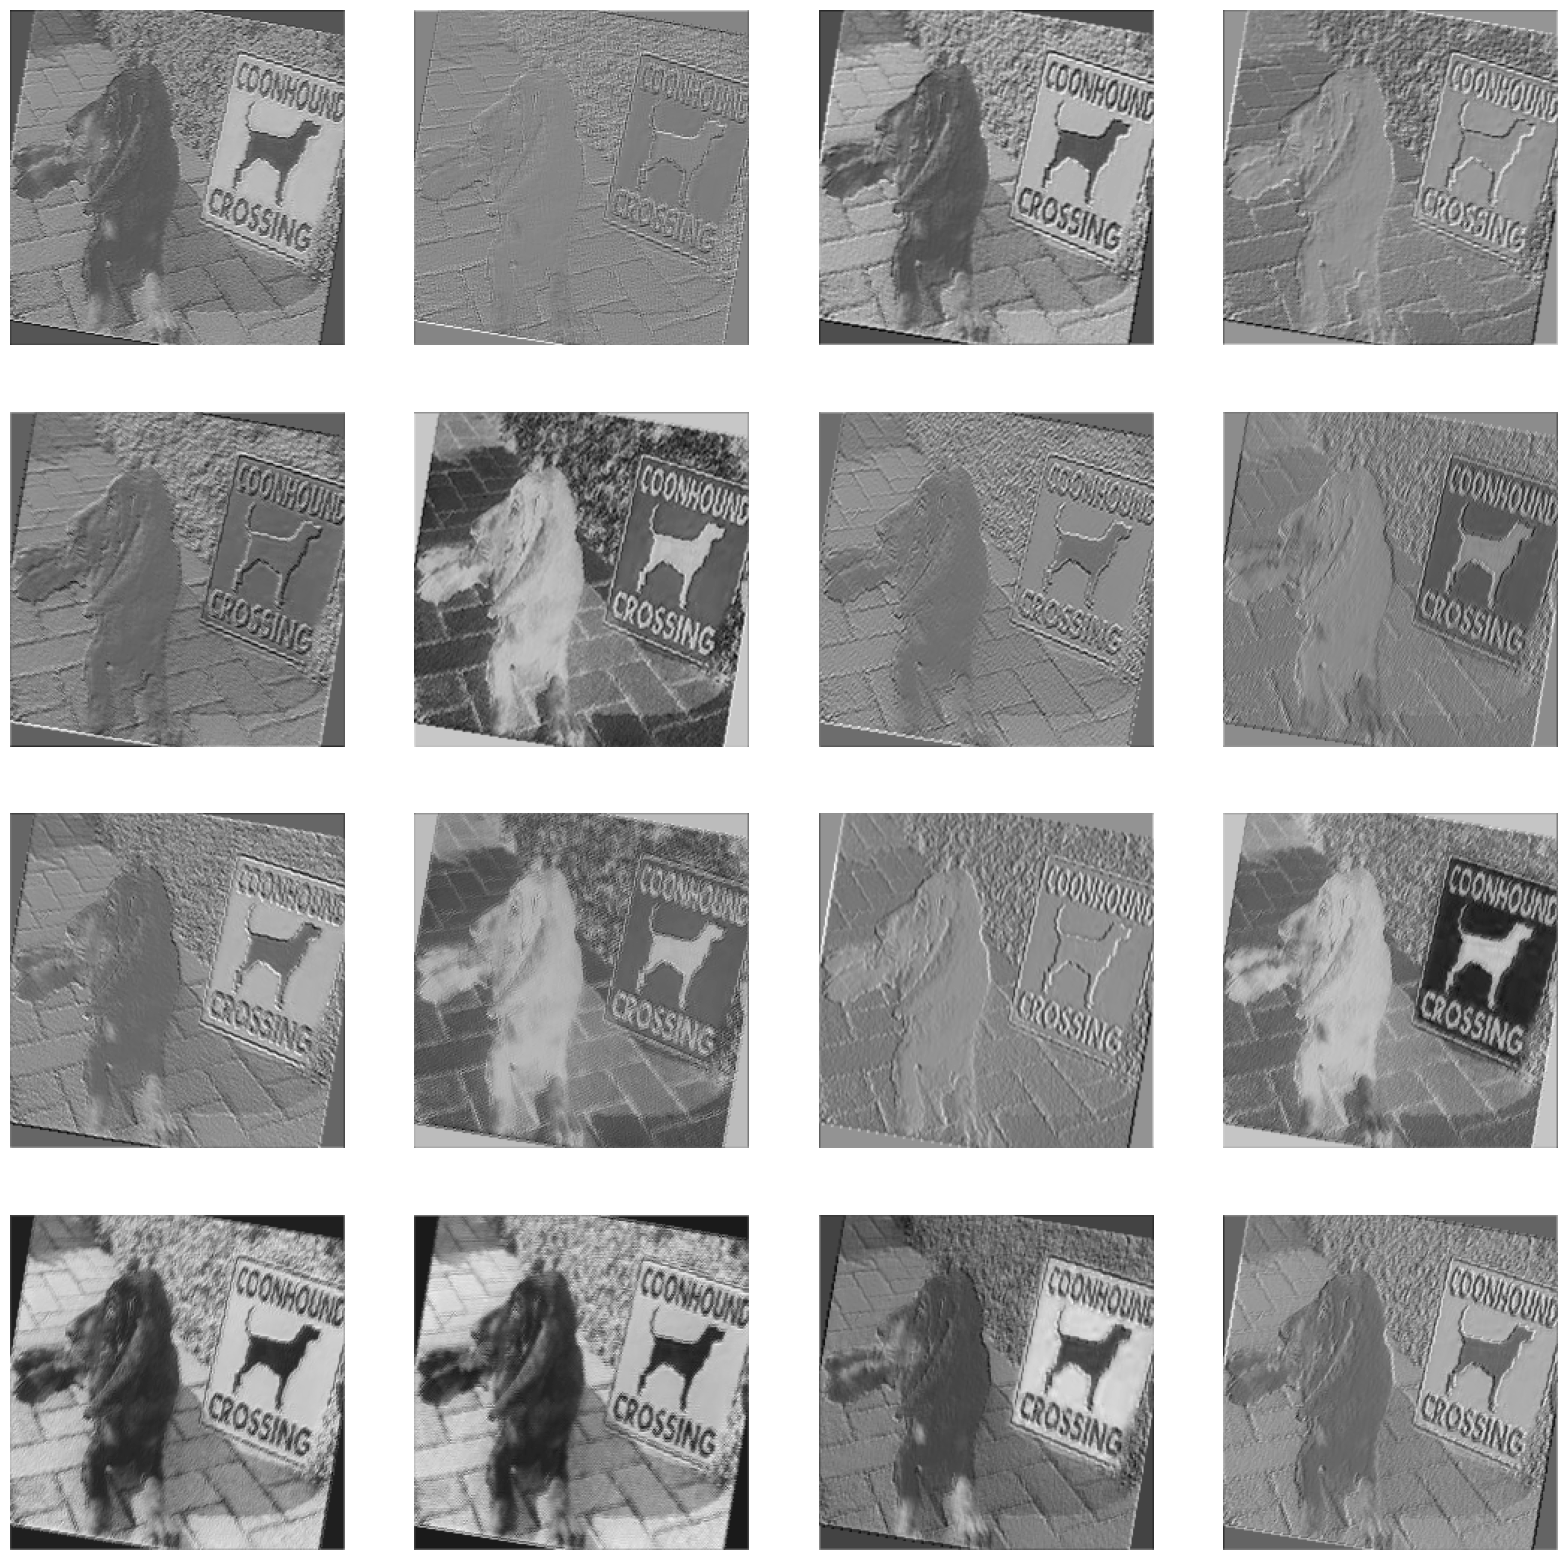

In [9]:
model.show_feature_map(model.get_feature_maps('conv1')[8].cpu())